In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
data/Neutral
data/Calm
data/Happy
data/Sad
data/Angry
data/Fearful
data/Disgust
data/Surprised


In [18]:
import glob
for path in glob.glob('**/*.mp4', recursive=True):
    print(path[-18:-16])

01
03
06
07
05
02
05
07
04
03
04
07
08
02
08
04
03
06
07
08
02
03
05
08
08
02
03
06
03
04
02
07
05
06
05
02
05
06
01
08
07
03
05
03
07
03
07
05
07
02
04
03
04
03
02
06
08
06
07
04
04
05
08
03
08
06
05
05
07
02
02
06
02
01
07
08
08
05
03
05
01
07
07
08
07
08
01
07
04
04
04
08
05
04
01
04
06
02
08
04
01
01
06
06
02
03
03
02
02
04
05
06
05
03
06
04
06
06
02
08
03
07
04
06
01
03
06
08
05
08
02
04
04
02
07
07
05
02
03
07
03
08
08
06
04
03
01
04
07
04
02
06
05
06
08
08
02
04
02
04
01
04
03
06
05
06
02
07
07
08
03
04
02
08
08
04
05
02
03
06
04
08
05
06
05
06
08
07
04
03
08
05
02
01
05
07
05
02
02
07
04
06
01
01
07
03
06
03
02
06
06
03
06
07
08
05
02
05
05
01
05
04
03
07
04
08
03
08
05
07
02
02
07
03
08
01
07
05
03
06
07
04
04
02
04
04
03
02
03
04
05
06
03
01
03
08
07
05
06
05
08
05
03
02
07
04
01
04
04
07
02
02
08
05
08
08
01
05
02
05
01
02
07
03
02
02
08
06
02
06
07
05
05
01
04
07
08
02
06
04
04
02
06
03
03
01
03
02
04
06
07
05
02
06
04
04
08
06
05
07
08
08
05
08
01
06
01
07
03
04
08
02
06
0

In [6]:
len(glob.glob('**/*.mp4', recursive=True))

2880

In [3]:
from torch.utils.tensorboard import SummaryWriter

epoch=6
loss=1
acc=0.3
writer = SummaryWriter(log_dir='runs/Sep18_14-54-47_naif-MS-7C91')
writer.add_scalar("Loss/train", loss, epoch)
writer.add_scalar("Loss/valid", loss, epoch)
writer.add_scalar("Acc/train", acc, epoch)
writer.add_scalar("Acc/valid", acc, epoch)
writer.flush()
writer.close()



In [4]:
model_name='naif'
f'checkpoints/{model_name}.pt'

'checkpoints/naif.pt'

In [1]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=2048, num_workers=2)
print(len(data_loaders['train']))

Dataset mean: tensor([0.4850, 0.4560, 0.4060]), std: tensor([0.2290, 0.2240, 0.2250])
626


In [2]:
images, labels=next(iter(data_loaders['train']))
len(labels.unique())

863

In [3]:
len(labels)

1024

In [3]:

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [5]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 1.66s ===============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [7]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 0.32s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [8]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 0.32s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [1]:
!pytest -vv src/train.py -k train_one_epoch -W ignore::DeprecationWarning

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 7.89s ========================


Now complete the `valid` function, then run the tests:

In [6]:
!pytest -vv src/train.py -k valid_one_epoch -W ignore::DeprecationWarning

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 4.32s ========================


Now complete the `optimize` function, then run the tests:

In [7]:
!pytest -vv src/train.py -k optimize -W ignore::DeprecationWarning

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

======================= 1 passed, 3 deselected in 10.12s =======================


Finally, complete the `test` function then run the tests:

In [9]:
!pytest -vv src/train.py -k one_epoch_test -W ignore::DeprecationWarning

============================= test session starts ==============================
platform linux -- Python 3.9.17, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/Woman-Classifier
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

======================= 1 passed, 3 deselected in 37.94s =======================


In [1]:
import torch
checkpoint=torch.load(f'checkpoints/last_Regions32.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
torch.save({
            'epochs': 18,
            'model_state_dict': checkpoint['model_state_dict'],
            }, f'checkpoints/last_Regions32.pt')


In [2]:
checkpoint['epochs']

33

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [1]:
batch_size = 1024  # size of the minibatch for stochastic gradient descent (or Adam)
num_epochs = 25      # number of epochs for training
num_classes = 1000       # number of classes. Do not change this
learning_rate = 0.05  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel3
import torch
# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size)
torch.backends.cuda.matmul.allow_tf32=True
torch.backends.cudnn.allow_tf32=True
# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel3(num_classes=num_classes)
model.load_state_dict(torch.load('checkpoints/M3_best_val_loss.pt'))

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)

Dataset mean: tensor([0.4850, 0.4560, 0.4060]), std: tensor([0.2290, 0.2240, 0.2250])


In [3]:

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/M3_best_val_loss.pt",
    run_logs=True,
    patience=2
)

Training:   0%|                                        | 0/1252 [00:00<?, ?it/s]

In [ ]:
import torch
torch.save(model.state_dict(), 'checkpoints/M3_best_val_loss.pt')
torch.save(optimizer.state_dict(), 'checkpoints/M3_optim.pt')

## MODEL2

In [1]:
batch_size = 32   # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 100      # number of epochs for training
num_classes = 1       # number of classes. Do not change this
dropout = 0.3         # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

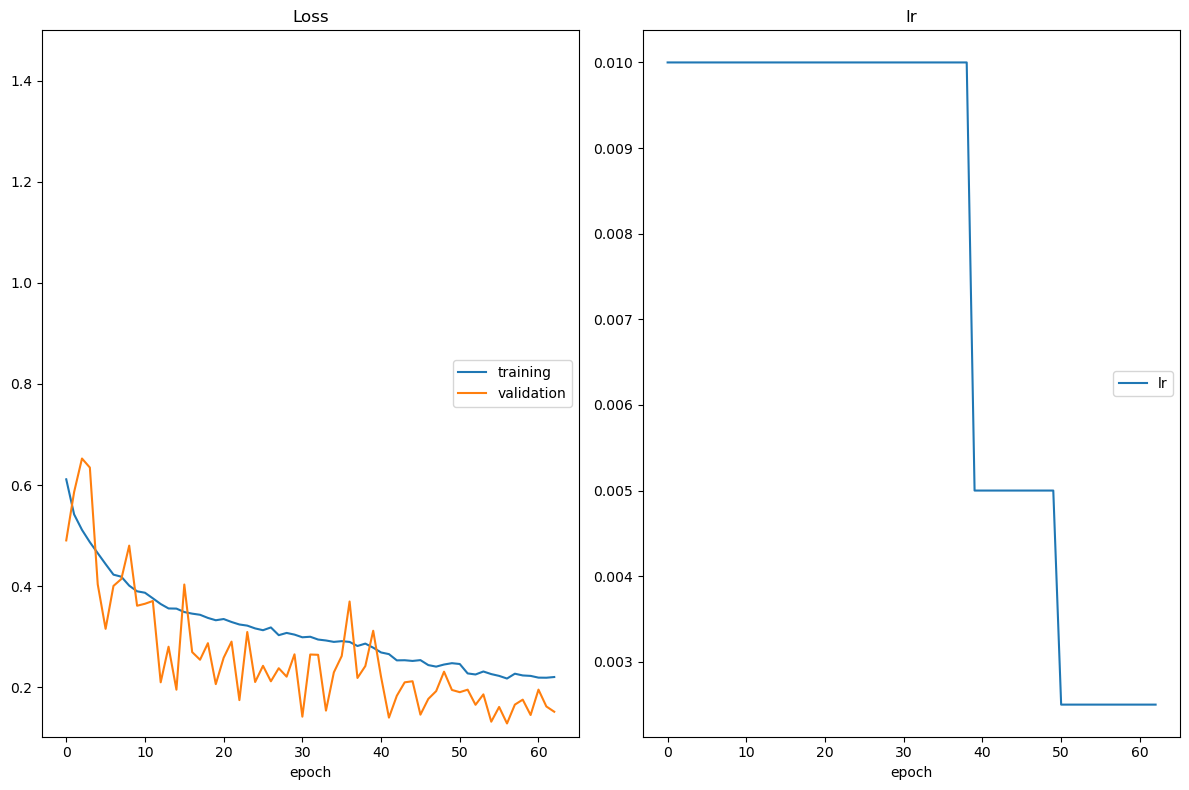

Training:   4%|█▍                              | 20/461 [00:10<03:41,  1.99it/s]

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel2

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel2(num_classes=num_classes,dropout=dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v2_best_val_loss.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=8
)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [3]:

from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|████████████████████████████████| 144/144 [00:13<00:00, 10.40it/s]

Test Loss: 0.160225


Test Accuracy: 91% (4188/4600)


0.1602245857163023

In [5]:
torch.save(model.state_dict(),'checkpoints/v2_best_val_loss.pt')

In [ ]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel2
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel2(num_classes=num_classes, dropout=dropout)

model_b.load_state_dict(torch.load('checkpoints/v2_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

In [1]:

from src.model import ShuffleModel

list(ShuffleModel().children())

/home/naif/miniconda3/envs/MLenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Sequential(
   (0): Sequential(
     (0): Conv2dNormActivation(
       (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
       (2): Hardswish()
     )
     (1): InvertedResidual(
       (block): Sequential(
         (0): Conv2dNormActivation(
           (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
           (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
           (2): ReLU(inplace=True)
         )
         (1): Conv2dNormActivation(
           (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
         )
       )
     )
     (2): InvertedResidual(
       (block): Sequential(
         (0): Conv2dNormActivation(
           (0): Conv2d(16, 64, kernel_size=(1, 1), s

## Model3

In [1]:
batch_size = 32   # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 50     # number of epochs for training
num_classes = 1       # number of classes. Do not change this
dropout = 0.3         # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel3

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel3(num_classes=num_classes,dropout=dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)

Dataset mean: tensor([0.4850, 0.4560, 0.4060]), std: tensor([0.2290, 0.2240, 0.2250])


TypeError: MyModel3.__init__() got an unexpected keyword argument 'dropout'

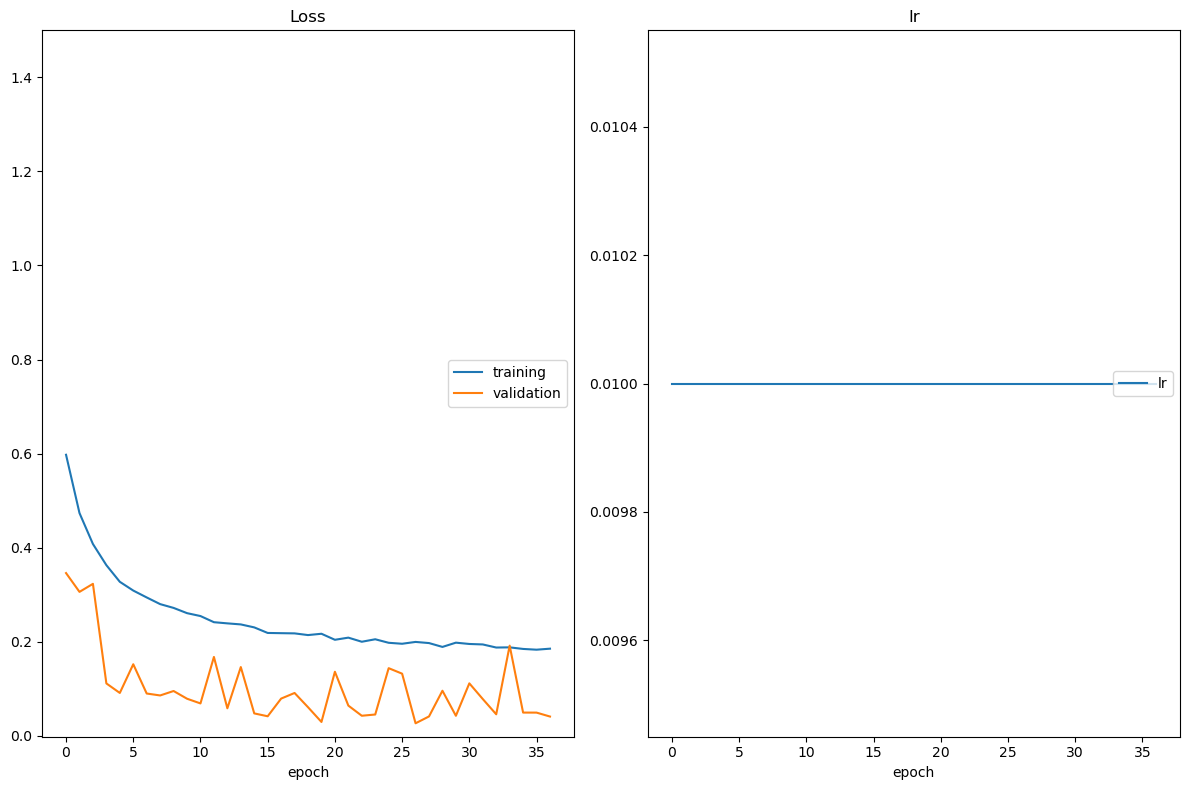

Training:   3%|█                               | 18/551 [00:04<02:08,  4.15it/s]


KeyboardInterrupt: 

In [3]:



# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v3_best_val_loss.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=6
)

In [7]:

from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|████████████████████████████████| 104/104 [00:08<00:00, 11.84it/s]


Test Loss: 0.879778


Test Accuracy: 65% (2170/3309)


0.8797779568972494

In [8]:
import torch
torch.save(model.state_dict(),'checkpoints/v3_best_val_loss.pt')

In [9]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel3
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel3(num_classes=num_classes, dropout=dropout)

model_b.load_state_dict(torch.load('checkpoints/v3_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


Testing: 100%|████████████████████████████████| 104/104 [00:08<00:00, 11.91it/s]


Test Loss: 0.879778


Test Accuracy: 65% (2170/3309)


0.8797779568972494

## Model4

In [1]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 100     # number of epochs for training
num_classes = 2       # number of classes. Do not change this
learning_rate = 0.1  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001    # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel4
import torch
# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel4(num_classes=num_classes)
# model.load_state_dict(torch.load("checkpoints/v4_best_val_loss.pt"))
# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)

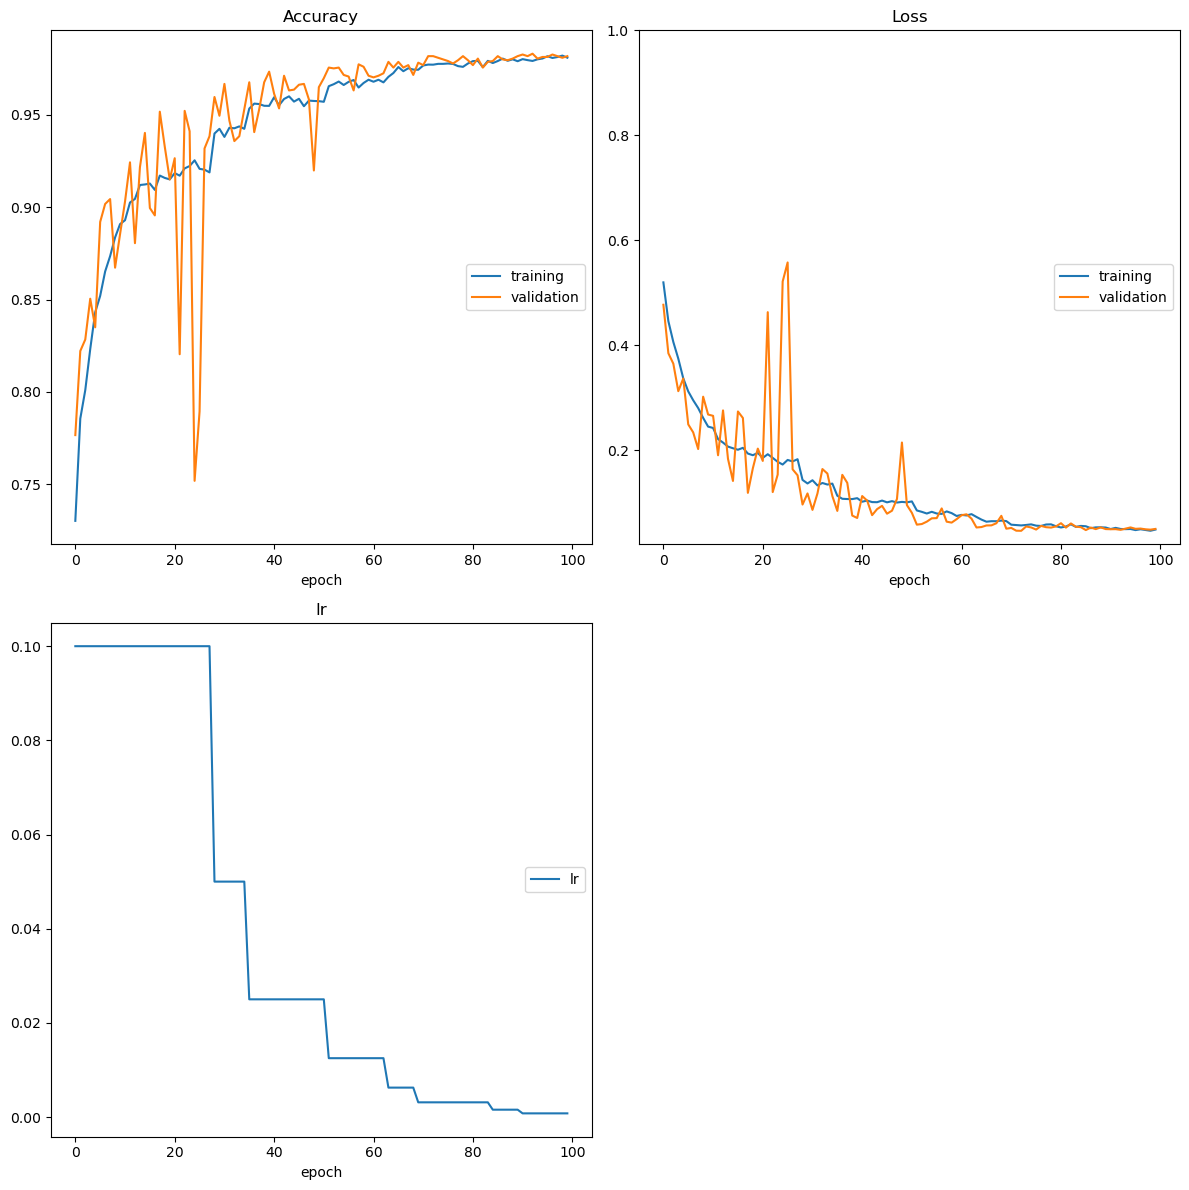

Epoch: 100 	Training Loss: 0.048724 	Validation Loss: 0.049955	Training Acc: 0.981 	Validation Acc: 0.982


In [4]:



# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v4_best_val_loss.pt",
    interactive_tracking=True,
    patience=2
)

In [5]:
from src.train import one_epoch_test

one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.57it/s]

Test Loss: 0.345799


Test Accuracy: 87% (1584/1820)


0.3457985033591588

In [6]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel4
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel4(num_classes=num_classes)

model_b.load_state_dict(torch.load('checkpoints/v4_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


Testing: 100%|██████████████████████████████████| 15/15 [00:03<00:00,  3.76it/s]

Test Loss: 0.360688


Test Accuracy: 85% (1564/1820)


0.36068774610757837

In [7]:
import torch
torch.save(model.state_dict(),'checkpoints/v5_best_val_loss.pt')

In [1]:
from src.model import MyModel5,MyModel4, MyModel6
import torch
model = MyModel5(num_classes=2)
model.load_state_dict(torch.load("checkpoints/v5_best_val_loss.pt"))

/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [2]:
from src.data import get_data_loaders, visualize_image

data_loaders = get_data_loaders(batch_size=1, valid_size=0.1)
sample=iter(data_loaders['test'])

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


In [3]:

image,label=next(sample)
print(image.squeeze(0).shape)

torch.Size([3, 224, 224])


In [ ]:
import torch
import matplotlib.pyplot as plt

image,label=next(sample)
print(image.squeeze(0).shape)

infer=model.Dconvs(image)
print(infer)
prop=torch.softmax(model.fc(infer), dim=1)
idx=torch.argmax(prop, dim=1)
print(prop, idx)
plt.subplot(121)
visualize_image(image.squeeze(0),label,data_loaders['valid'].dataset.classes)
plt.subplot(122)
plt.imshow(infer[0][idx.item()].detach().numpy())
plt.show()

In [10]:

import torch
int(torch.__version__[0])
torch._dynamo.config.verbose=True
torch._dynamo.config.suppress_errors = True

## Model5

In [1]:
batch_size = 1024  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 20     # number of epochs for training
num_classes = 2       # number of classes. Do not change this
learning_rate = 0.1  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             


In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel5
import torch

torch.backends.cuda.matmul.allow_tf32=True
torch.backends.cudnn.allow_tf32=True
# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel5(num_classes=num_classes)

# model.load_state_dict(torch.load("checkpoints/v5_best_val_loss.pt"))
# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

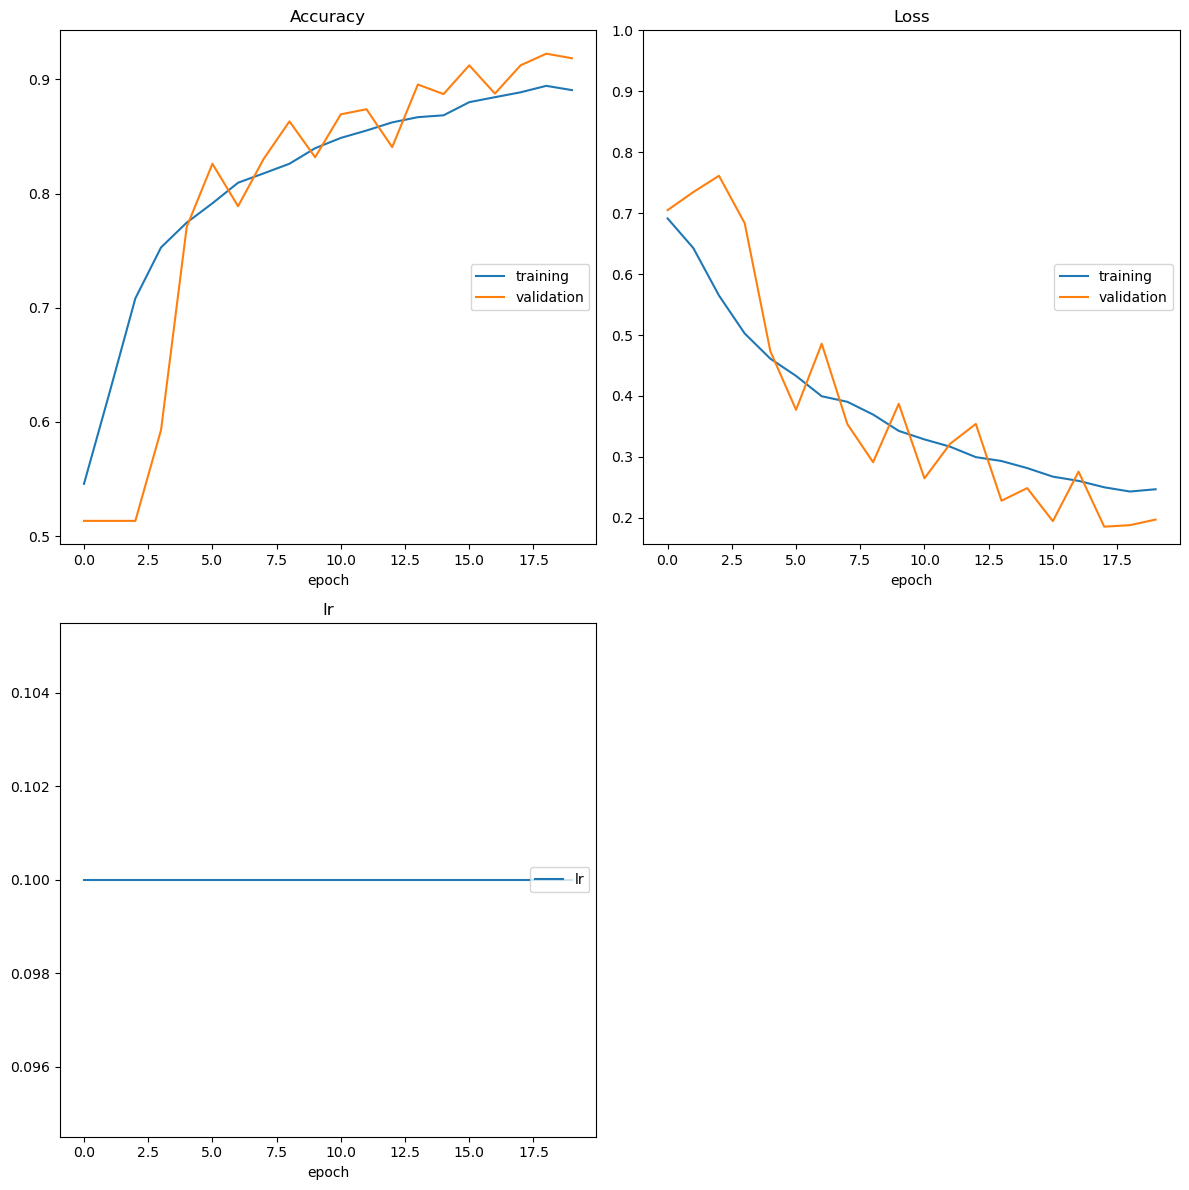

Epoch: 20 	Training Loss: 0.246966 	Validation Loss: 0.197255	Training Acc: 0.891 	Validation Acc: 0.919


In [4]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v5_best_val_loss.pt",
    interactive_tracking=True,
    patience=2
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|████████████████████████████████████| 1/1 [00:23<00:00, 23.33s/it]

Test Loss: 0.473211


Test Accuracy: 76% (1396/1820)


0.47321057319641113

In [6]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel5
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel5(num_classes=num_classes)

model_b.load_state_dict(torch.load('checkpoints/v5_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.68it/s]

Test Loss: 0.337660


Test Accuracy: 87% (1584/1820)


0.3376599411169688

In [7]:
import torch
torch.save(model.state_dict(),'checkpoints/v5_best_val_loss.pt')

## Model6

In [1]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 120     # number of epochs for training
num_classes = 1       # number of classes. Do not change this
learning_rate = 0.1  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel6
import torch
# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel6(num_classes=num_classes)
# model.load_state_dict(torch.load("checkpoints/v6_best_val_loss.pt"))
# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RegNet_Y_32GF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_32GF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [4]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

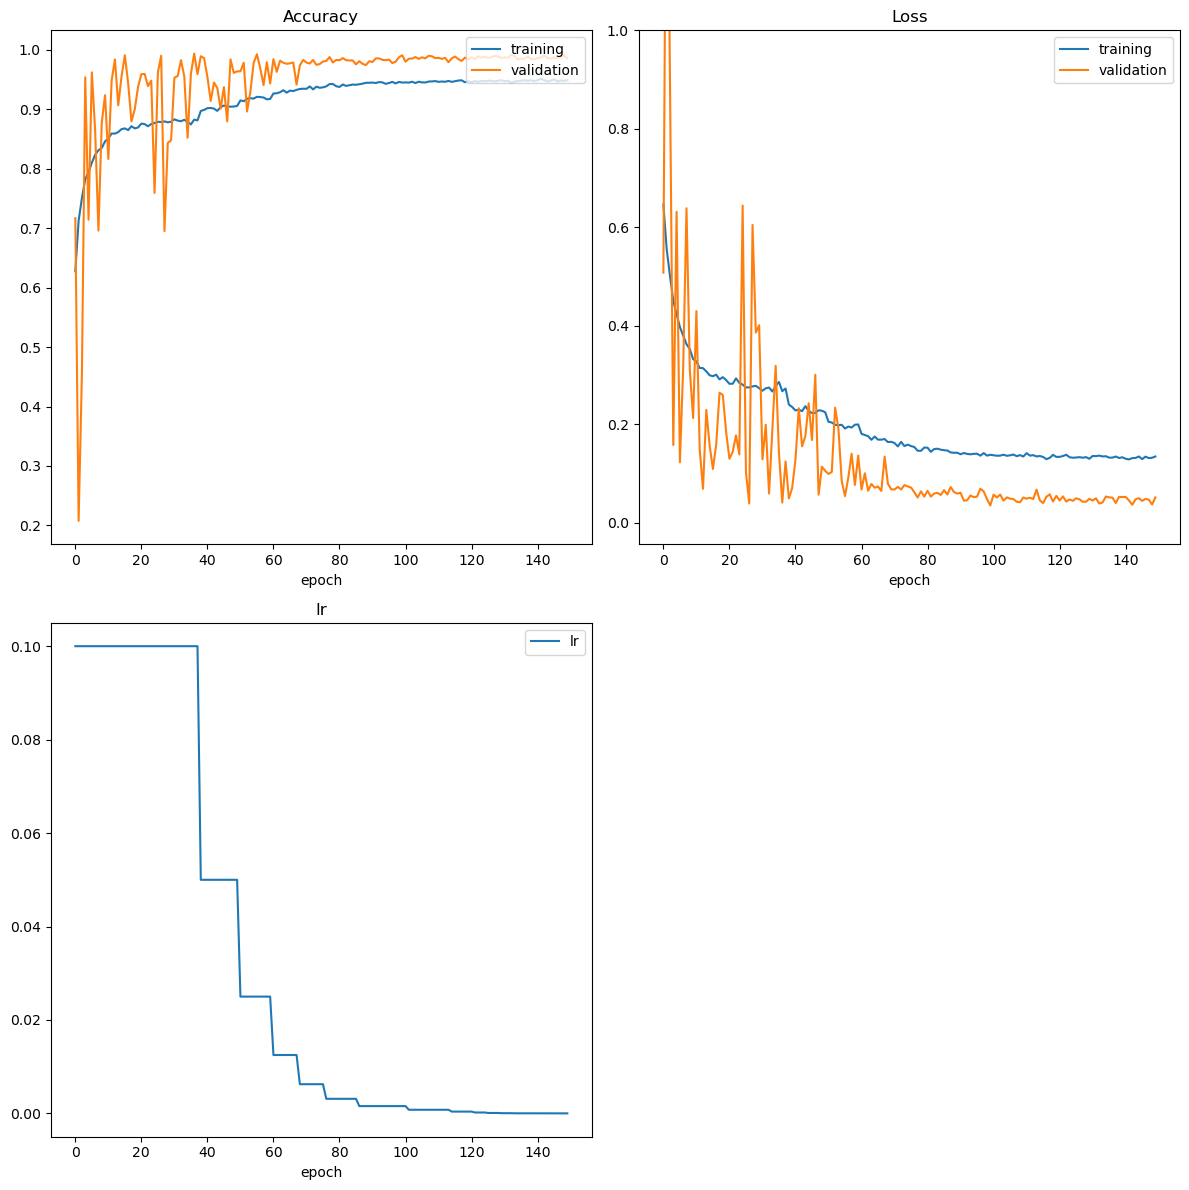

Epoch: 150 	Training Loss: 0.134871 	Validation Loss: 0.051846	Training Acc: 0.949 	Validation Acc: 0.986


In [11]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v6_best_val_loss.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=3
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing:  47%|████████████████▎                  | 7/15 [00:03<00:02,  3.42it/s]/home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664405705473/work/aten/src/ATen/native/cuda/Loss.cu:271: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [18,0,0] Assertion `t >= 0 && t < n_classes` failed.
/home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664405705473/work/aten/src/ATen/native/cuda/Loss.cu:271: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [19,0,0] Assertion `t >= 0 && t < n_classes` failed.
/home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664405705473/work/aten/src/ATen/native/cuda/Loss.cu:271: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [20,0,0] Assertion `t >= 0 && t < n_classes` failed.
/home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664405705473/work/aten/src/ATen/native/cuda/Loss.cu:271: nll_loss_forward_reduce_cuda_kernel_2d: block: [0,0,0], thread: [21,0,0] Assertion `t >= 0 && t < n_class

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [13]:
import torch
torch.save(model.state_dict(),'checkpoints/v6_best_val_loss.pt')

In [2]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel6
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel6(num_classes=num_classes)

model_b.load_state_dict(torch.load('checkpoints/v6_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RegNet_Y_32GF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_32GF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.43it/s]

Test Loss: 0.000000


Test Accuracy: 90% (1643/1819)


0.0

## Model6 no Linear

In [1]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 100     # number of epochs for training
num_classes = 2       # number of classes. Do not change this
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.002     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel6
import torch
# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel6(num_classes=num_classes)
# model.load_state_dict(torch.load("checkpoints/v6_2_best_val_loss.pt"))
# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RegNet_Y_32GF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_32GF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

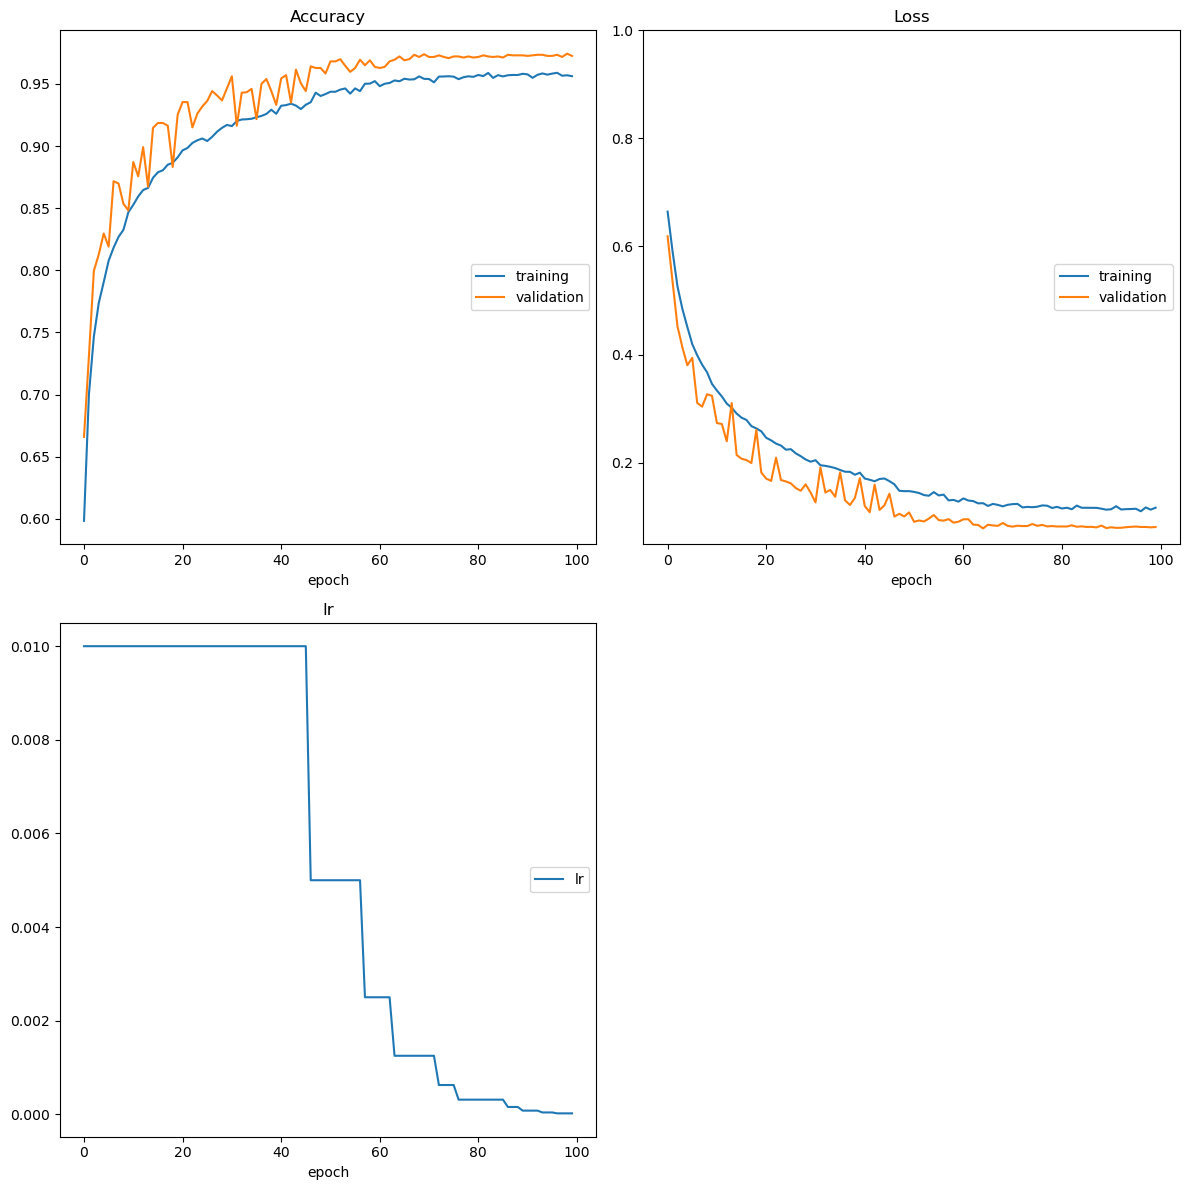

Epoch: 100 	Training Loss: 0.116477 	Validation Loss: 0.080665	Training Acc: 0.956 	Validation Acc: 0.973
Epoch 00100: reducing learning rate of group 0 to 1.0000e-05.


In [4]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v6_2_best_val_loss.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=2
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.28it/s]

Test Loss: 0.343793


Test Accuracy: 85% (1557/1820)


0.3437931040922801

In [20]:
# load the model that got the best validation accuracy
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_optimizer, get_loss
from src.data import get_data_loaders
from src.model import MyModel6
data_loaders = get_data_loaders(batch_size=batch_size)

loss = get_loss()
model_b = MyModel6(num_classes=num_classes)

model_b.load_state_dict(torch.load('checkpoints/v6_2_best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model_b, loss)

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RegNet_Y_32GF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_32GF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.18it/s]

Test Loss: 0.363516


Test Accuracy: 85% (1562/1820)


0.36351606473326686

In [21]:
import torch
torch.save(model.state_dict(),'checkpoints/v6_2_best_val_loss.pt')

## Model7

In [1]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 150     # number of epochs for training
num_classes = 1       # number of classes. Do not change this
learning_rate = 0.1  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel7

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel7(num_classes=num_classes)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

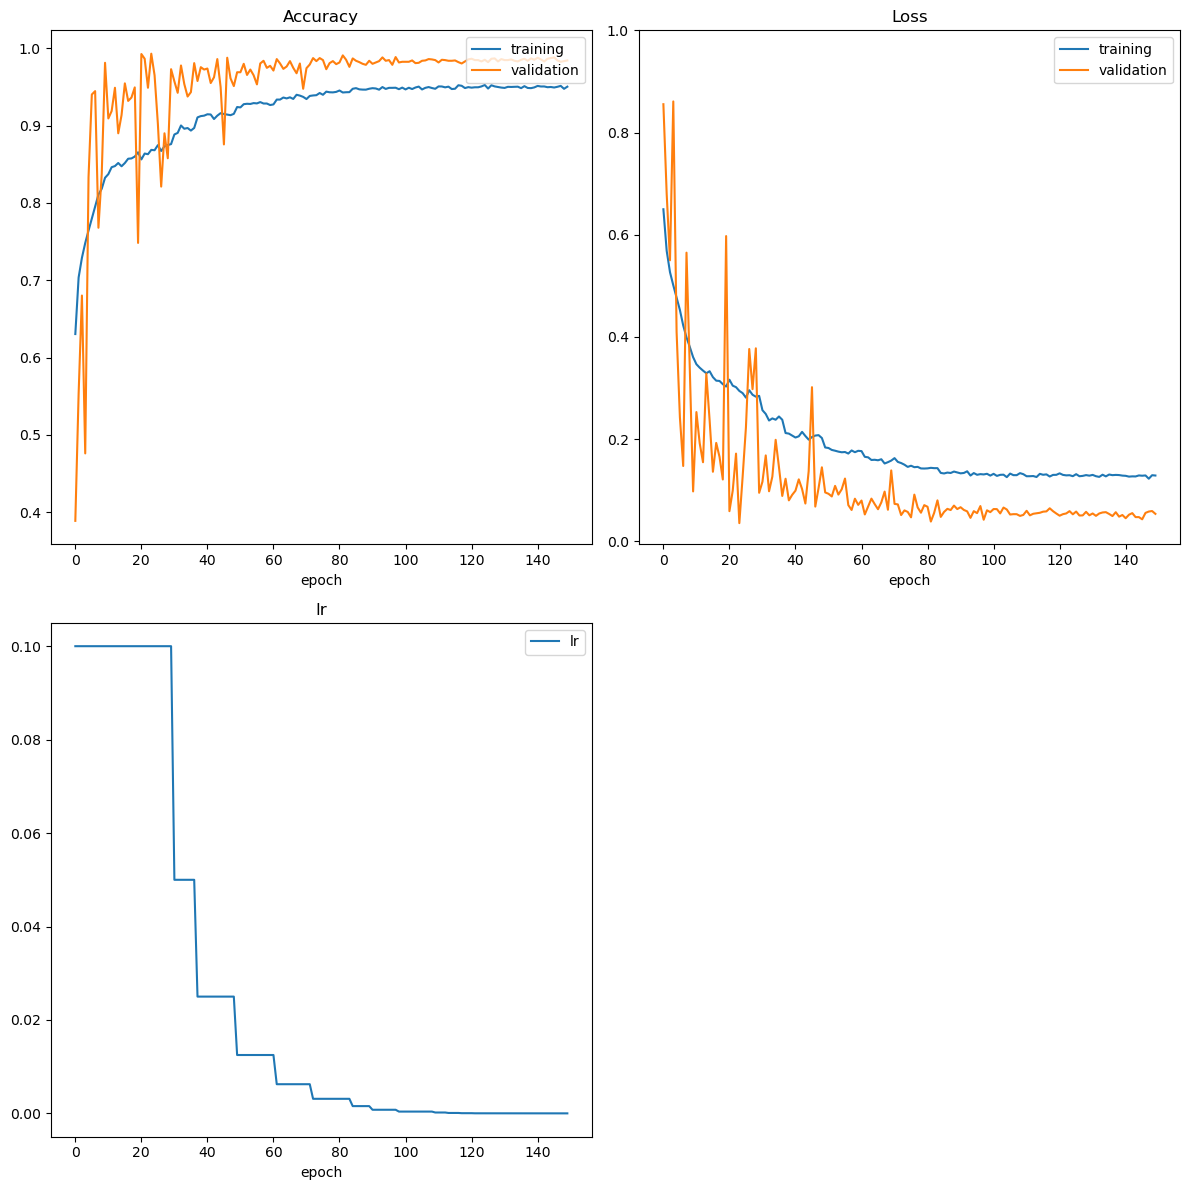

Epoch: 150 	Training Loss: 0.128830 	Validation Loss: 0.053805	Training Acc: 0.950 	Validation Acc: 0.984


In [4]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/v7_best_val_loss.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=3
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.42it/s]

Test Loss: 0.292541


Test Accuracy: 89% (1628/1818)


0.2925412128369013

In [ ]:
import torch
torch.save(model.state_dict(),'checkpoints/v7_best_val_loss.pt')

## shuffle x1

In [1]:
batch_size = 64 # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 150     # number of epochs for training
num_classes = 1       # number of classes. Do not change this
learning_rate = 0.1  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import ShuModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = ShuModel(num_classes=num_classes)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

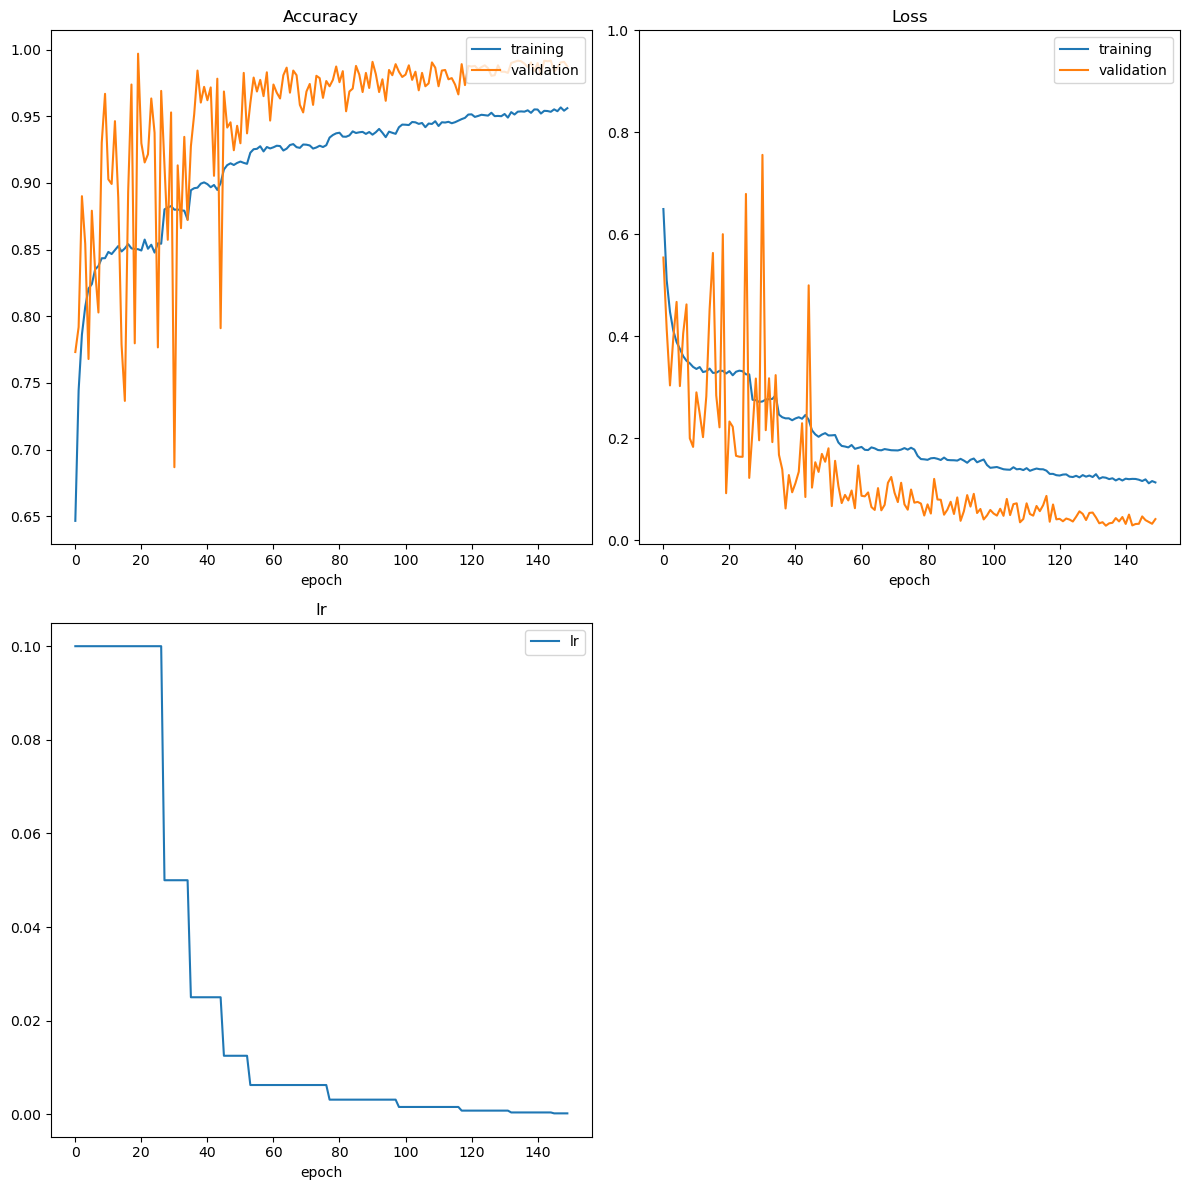

Epoch: 150 	Training Loss: 0.113074 	Validation Loss: 0.041181	Training Acc: 0.956 	Validation Acc: 0.987


In [4]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/shuffle.pt",
    interactive_tracking=True,
    run_logs=True,
    patience=4
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 29/29 [00:03<00:00,  7.48it/s]

Test Loss: 0.288055


Test Accuracy: 89% (1626/1819)


0.288055454926758

In [6]:
import torch
torch.save(model.state_dict(),'checkpoints/shuffle.pt')

## shuffle x0

In [1]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.1       # fraction of the training data to reserve for validation
num_epochs = 140     # number of epochs for training
num_classes = 1       # number of classes. Do not change this
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.001     # regularization. Increase this to combat overfitting
momentum=0.8             

In [2]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import ShuModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = ShuModel(num_classes=num_classes)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate,momentum=momentum,weight_decay=weight_decay)
# Get the loss using get_loss
loss = get_loss()

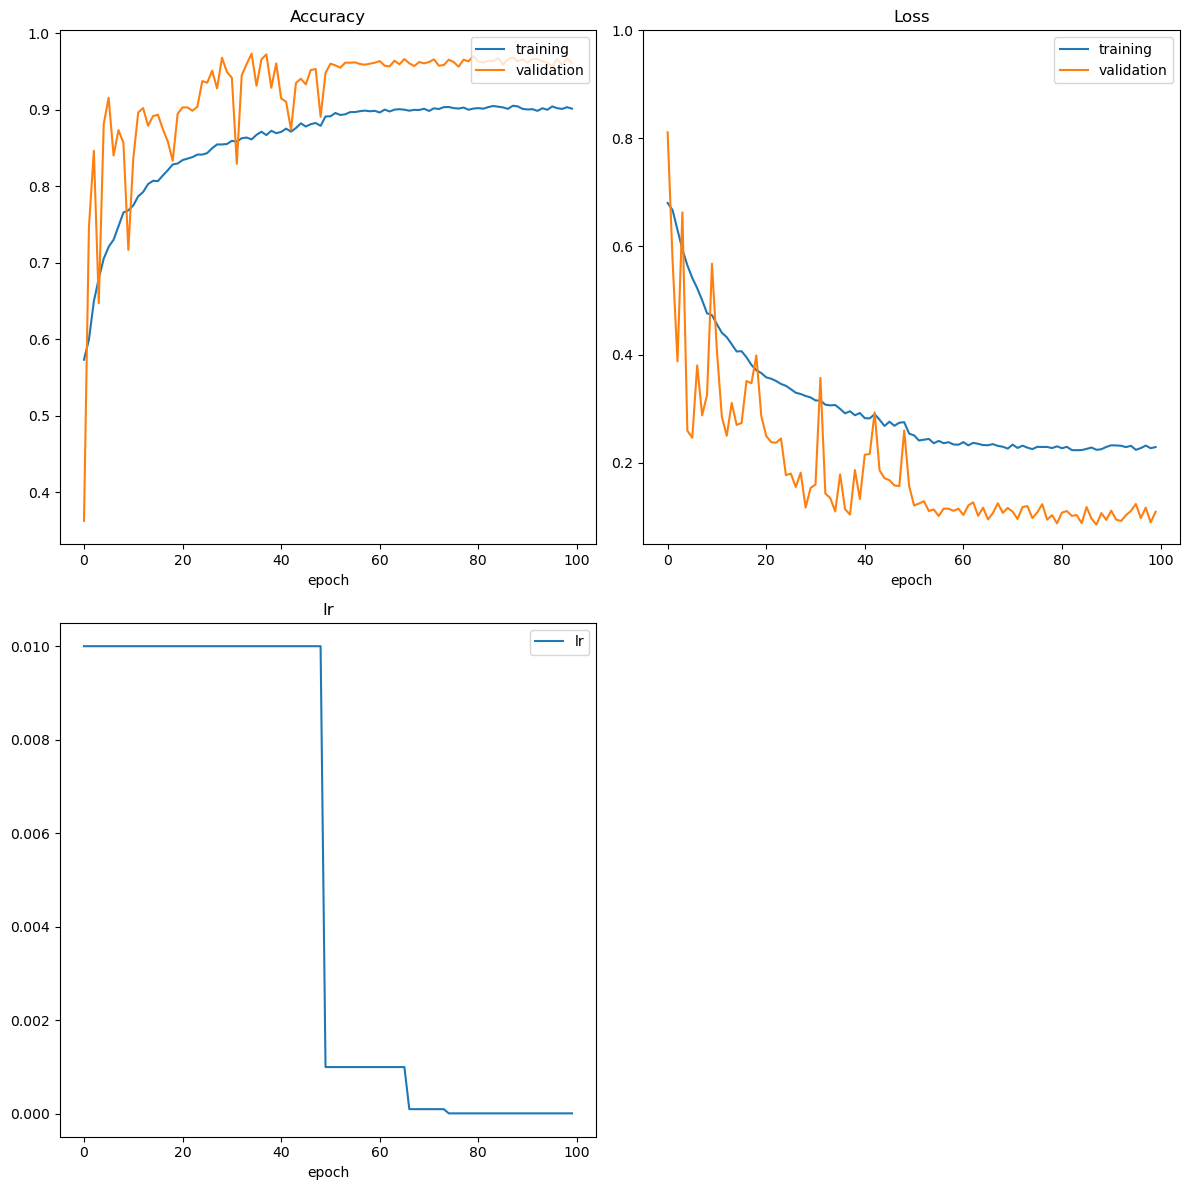

Epoch: 100 	Training Loss: 0.228764 	Validation Loss: 0.108974	Training Acc: 0.901 	Validation Acc: 0.961


Training:   4%|█▏                               | 6/162 [00:03<01:19,  1.96it/s]


KeyboardInterrupt: 

In [4]:
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/shuffle0.pt",
    interactive_tracking=True,
    patience=3
)

In [5]:
from src.train import one_epoch_test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 15/15 [00:04<00:00,  3.66it/s]

Test Loss: 0.395660


Test Accuracy: 83% (1515/1819)


0.39566020468870794

In [ ]:
import torch
torch.save(model.state_dict(),'checkpoints/shuffle0.pt')

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [27]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.0, pluggy-1.2.0 -- /home/naif/miniconda3/envs/MLenv/bin/python
cachedir: .pytest_cache
rootdir: /home/naif/Downloads/starter-kit
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

============================== 1 passed in 1.11s ===============================


Allright, now we are ready to export our model using our Predictor class:

In [1]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel4
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes


# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel4(num_classes=1).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

model.load_state_dict(torch.load('checkpoints/v4_best_val_loss.pt'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()


# dummy_input = torch.zeros(1,3,256,256)
# # inputs = ['images']
# # outputs = ['scores']
# # dynamic_axes= {'input':{0:'batch_size' , 2:'width', 3:'height'}, 'output':{0:'batch_size' , 2:'width', 3:'height'}}
# torch.onnx.export(predictor, dummy_input, 'model.onnx', verbose=True)


# Export using torch.jit.script
scripted_predictor =torch.jit.script(predictor) 

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])
Reusing cached mean and std


/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
import onnx

onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)

FileNotFoundError: [Errno 2] No such file or directory: 'model.onnx'

In [3]:
import onnxruntime
import PIL
import numpy as np
ort_session = onnxruntime.InferenceSession("model.fixed.onnx")
img=PIL.Image.open("images/man/00000238.jpg", mode='r')
img=img.resize((256,256),resample=PIL.Image.BILINEAR)
img=np.array(img, dtype=np.float32)
print(img.shape)
print(img.dtype)
img=np.transpose(img[None,],[0,3,1,2])
img.shape

(256, 256, 3)
float32


(1, 3, 256, 256)

In [4]:
ort_inputs = {ort_session.get_inputs()[0].name: img}
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[0]

In [5]:
img_out_y

array([[0.]], dtype=float32)

Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [13]:
import torch
from src.data import get_data_loaders
data_loaders = get_data_loaders(batch_size=1, valid_size=0)
# Load using torch.jit.load
model_reloaded = torch.jit.load("checkpoints/original_exported.pt") 

Reusing cached mean and std
Dataset mean: tensor([0.4690, 0.3993, 0.3567]), std: tensor([0.3180, 0.3058, 0.3087])


In [14]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

  0%|                                          | 1/1819 [00:00<03:16,  9.26it/s]/home/naif/miniconda3/envs/MLenv/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %373 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664405705473/work/torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
100%|███████████████████████████████████████| 1819/1819 [00:38<00:00, 47.69it/s]

Accuracy: 0.8834524463991204


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

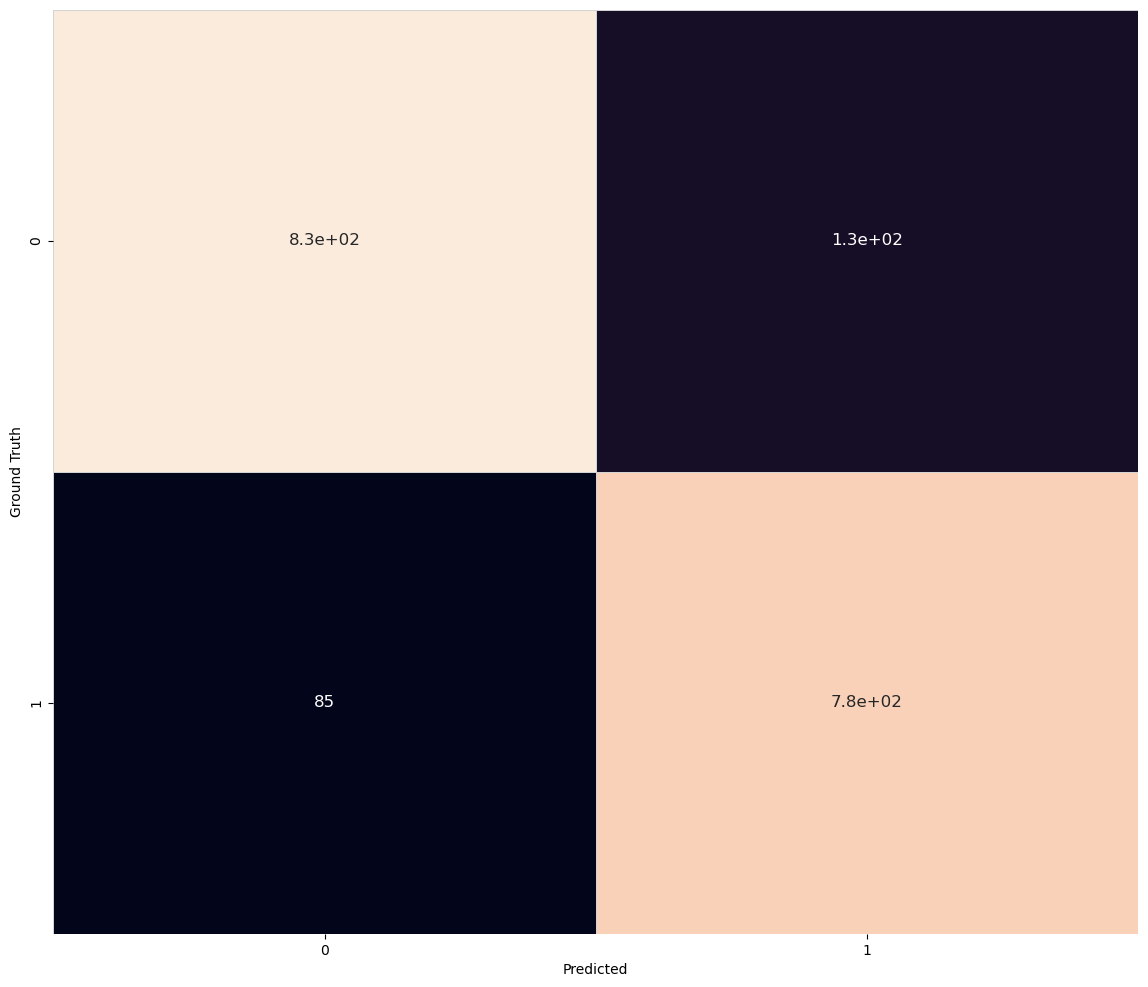

In [15]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)